# Using 2017 data

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
import urllib
import os
# from bokeh.plotting import *
# from bokeh.models import HoverTool
from collections import OrderedDict

import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
_src_dir_ = "data/"

In [1]:
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [6]:
community = pd.read_csv(_src_dir_ + "CommAreas.csv")

In [7]:
community.head()

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510
1,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153
2,MULTIPOLYGON (((-87.62879823733725 41.80189303...,0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750
3,MULTIPOLYGON (((-87.6067081256125 41.816813770...,0,0,0,0,38,GRAND BOULEVARD,38,4.849250e+07,28196.837157
4,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,39,KENWOOD,39,2.907174e+07,23325.167906


In [8]:
community[["AREA_NUMBE", "COMMUNITY", "AREA_NUM_1"]]

,AREA_NUMBE,COMMUNITY,AREA_NUM_1
0,35,DOUGLAS,35
1,36,OAKLAND,36
2,37,FULLER PARK,37
3,38,GRAND BOULEVARD,38
4,39,KENWOOD,39
5,4,LINCOLN SQUARE,4
6,40,WASHINGTON PARK,40
7,41,HYDE PARK,41
8,42,WOODLAWN,42
9,1,ROGERS PARK,1


## Distribution of Trip Duration

## Duration vs. Distance

### Correlation Matrix

In [4]:
##             Trip.Min Trip.Miles      Fare Trip.Total
## Trip.Min   1.0000000  0.6654975 0.7913326  0.4083894
## Trip.Miles 0.6654975  1.0000000 0.8399675  0.4608900
## Fare       0.7913326  0.8399675 1.0000000  0.5330360
## Trip.Total 0.4083894  0.4608900 0.5330360  1.0000000

### Time of the Day (Speed)

## Linear Regression

In [159]:
from sklearn import linear_model
import random

# sample = fare.sample(frac=0.01, replace=True)
# print len(sample)
X = fare_l.trip_miles.reshape(len(fare_l),1)
y = fare_l.fare.reshape(len(fare_l),1)
lr = linear_model.LinearRegression()
lr.fit(X,y)
pred = lr.predict(X)
print lr.score(X,y)

In [171]:
print lr.coef_

37046

In [ ]:
# def outlierCleaner(predictions, x, y):
#     import numpy
#     cleaned_data = []
#     residual = (predictions-y) ** 2
#     for i in range(len(residual)):
#         if residual[i][0] <= numpy.percentile(residual, 90):
#             cleaned_data.append((x[i][0],y[i][0]))
#     return cleaned_data

In [ ]:
# cleaned_data = outlierCleaner(pred,X,y)
# new_X,new_y = zip(*cleaned_data) 
# X = numpy.array(new_X).reshape(len(new_X),1)
# y = numpy.array(new_y).reshape(len(new_X),1)
# lr = linear_model.LinearRegression()
# lr.fit(X,y)
# print lr.coef_
# print lr.score(X,y)

### Process data

In [9]:
taxi_data['Company'].fillna('None', inplace=True)
taxi_data = taxi_data.dropna()

taxi_data['year'] = taxi_data['Trip Start Timestamp'] .apply(lambda x: x[6:10])
taxi_data['month'] = taxi_data['Trip Start Timestamp'].apply(lambda x: x[:2])
taxi_data['date'] = taxi_data['Trip Start Timestamp'].apply(lambda x: x[:5])
taxi_data['hr'] = taxi_data['Trip Start Timestamp'].apply(lambda x: int(x[11:13]))
taxi_data['ap'] = taxi_data['Trip Start Timestamp'].apply(lambda x: x[-2:])
taxi_data.loc[(taxi_data['ap']=='PM')&(taxi_data.hr !=12),'hr'] = taxi_data.loc[(taxi_data['ap']=='PM')&(taxi_data.hr !=12),'hr'] + 12
taxi_data.loc[(taxi_data['ap']=='AM')&(taxi_data.hr ==12),'hr'] = 0

taxi_data['Fare'] = taxi_data['Fare'] .apply(lambda x: float(str(x)[1:]))
print len(taxi_data)

85291780


In [18]:
result_d = pd.DataFrame()
result_h = pd.DataFrame()
for file in os.listdir('G:/data_incubator/data/'):
    if file.startswith('chicago_taxi_2017'):
        print file
        taxi_data =  pd.read_csv('G:/data_incubator/data/' + file)
        print len(taxi_data)
        taxi_data['Company'].fillna('None', inplace=True)
        taxi_data = taxi_data.dropna(subset=['Trip Start Timestamp','Trip Seconds','Trip Miles','Fare','Company','Trip ID','Trip Total'])
        
        taxi_data['month'] = taxi_data['Trip Start Timestamp'].apply(lambda x: x[:2])
        taxi_data['date'] = taxi_data['Trip Start Timestamp'].apply(lambda x: x[:5])
        taxi_data['hr'] = taxi_data['Trip Start Timestamp'].apply(lambda x: int(x[11:13]))
        taxi_data['ap'] = taxi_data['Trip Start Timestamp'].apply(lambda x: x[-2:])
        taxi_data.loc[(taxi_data['ap']=='PM')&(taxi_data.hr !=12),'hr'] = taxi_data.loc[(taxi_data['ap']=='PM')&(taxi_data.hr !=12),'hr'] + 12
        taxi_data.loc[(taxi_data['ap']=='AM')&(taxi_data.hr ==12),'hr'] = 0
        
        taxi_data['Trip Total'] = taxi_data['Trip Total'] .apply(lambda x: float(str(x)[1:]))
        taxi_data['Fare'] = taxi_data['Fare'] .apply(lambda x: float(str(x)[1:]))
        print len(taxi_data)
        taxi_data.to_csv('G:/data_incubator/data/'+ os.path.splitext(file)[0] +'.csv',index=False)
#         hour = taxi_data[[u'Trip Seconds', u'Trip Miles','Trip Total','hr']].groupby('hr').agg(['count','mean']).reset_index()
#         day = taxi_data[[u'Trip Seconds', u'Trip Miles','Trip Total','date']].groupby('date').agg(['count','mean']).reset_index()
#         day.columns = ['date','count1','trip_sec_mean','count2','trip_mile_mean','count3','trip_cost_mean']
#         day = day.drop(['count2','count3'],axis=1)
#         hour.columns = ['hr','count1','trip_sec_mean','count2','trip_mile_mean','count3','trip_cost_mean']
#         hour = hour.drop(['count2','count3'],axis=1)
#         result_d = pd.concat([result_d,day], axis=0)
#         result_h = pd.concat([result_h,hour], axis=0)
#         print file
# result_d.to_csv('G:/Incubator/chicago_taxi_2016_d.csv',index=False)
# result_h.to_csv('G:/Incubator/chicago_taxi_2016_h.csv',index=False)

chicago_taxi_201701.csv
1072018
1071933


In [88]:
result_h.groupby('hr').mean().reset_index().to_csv('G:/Incubator/chicago_taxi_2016_h_groupby.csv',index=False)

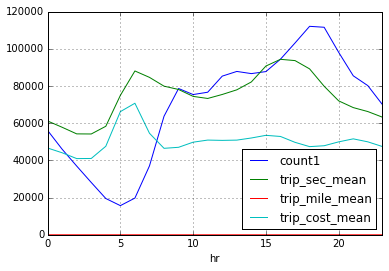

In [83]:
result_h.groupby('hr').mean().plot()